<a href="https://colab.research.google.com/github/stanislawcronberg/Numpy-Practice-Projects/blob/main/SVM/Simplified_SVM_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing a simplified SVM with Numpy from scratch

1. Problem statement
2. Point selection algorithm
3. 2D Case
    - Example 2D data
    - Criteria for support vectors in 2D
    - 2D Implementation
4. 3D Case
    - Example 3D data
    - Criteria for support vectors in 3D 
    - 3D Implementation

### 1. Problem Statement

We first build a hard margin linear SVM classifier. The conditions are:
- Minimize $\frac{1}{2}w^Tw$
- Subject to $(w^Tx^{(i)} + b) = 1$ for $i = 1, ..., \text{n_dimensions + 1}$

### Sample Dataset for 2D Case

$X$ contains our matrix of points, whereas $y$ contains a vector of their corresponding label.
- Where $y \in \{0, 1\}$ and $x \in R^2$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

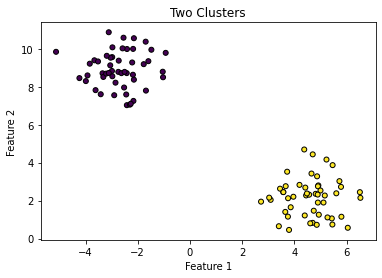

In [ ]:
from sklearn.datasets import make_blobs

# Our sample cluster data
X, y = make_blobs(n_features=2, centers=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1],marker='o', c=y,
            s=25, edgecolor='k')
plt.title('Two Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Point Selection Algorithm
- We make use of the `combinations()` function from the `itertools` package in order to generate all possible groups of points we want to consider
- Works for both the 2D and the 3D case of the algorithm we want to implement 

In [ ]:
from itertools import combinations

def get_combinations(X):
    """
    X -> (n_inputs, n_dimensions) numpy.ndarray
    Returns a numpy.darray of possible combinations of indices
    """

    # How many points we have to choose from
    n_points = X.shape[0]

    # How large we want our groups of candidate support vectors to be
    group_size = X.shape[1] + 1

    return np.array(list(combinations(range(n_points), group_size)))

For any group of three support vectors that we select we require that:
1. They do not all belong to the same class
2. They do not lie on the same line
    - We do this by ensuring that the triangle formed by the three points has a positive area


In [ ]:
def get_vector_from_points(a, b):
    """
    Returns the vector going from point a -> b
    """
    return b-a

In [ ]:
def are_supports_legal_2d(index_list, X, y) -> bool:
    """
    Checks if the points are not all from the same class
    Ensure that the support vectors are not collinear

    (All inputs are of type numpy.ndarray)
    index_list -> list of our indices to our points (1, 3)
    X          -> coordinates of our points (num_points, 2)
    y          -> classes of our points (num_points, 1)
    """
    # Get our list of classes
    classes = y[index_list]

    # Check if elements are from the same class
    if np.unique(classes).size == 1:
        return False

    # Get points
    p1 = X[index_list[0], :]
    p2 = X[index_list[1], :]
    p3 = X[index_list[2], :]

    # Create two vectors from our points
    v1 = get_vector_from_points(p1, p2)
    v2 = get_vector_from_points(p2, p3)

    # Test if the two vectors are linearly independent
    if np.linalg.det(np.vstack([v1, v2])) == 0:
        return False

    return True

In [ ]:
x1 = np.array([1, 1])
x2 = np.array([2, 2])
x3 = np.array([3, 3])
triangle_area(x1, x2, x3)

0.0

In [ ]:
b = np.linalg.det(np.vstack([x1, x2]))
b

0.0

In [ ]:
def find_best_svm_2D(X, y) -> tuple:


In [ ]:
combs2d = np.array(list(combinations(range(10), 3)))
combs2d

numpy.ndarray

In [ ]:
stacked = np.vstack([x1, x2, x3])
stacked = [1, 2, 3]

[array([5.72293008, 3.02697174]),
 array([-3.05358035,  9.12520872]),
 array([5.461939  , 3.86996267])]